# Question 1

## part 1

In [1]:
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np
from scipy import signal

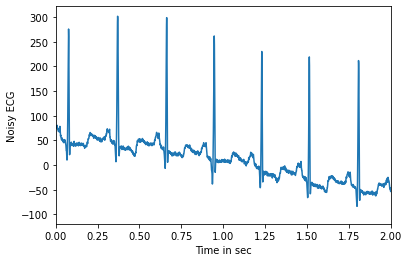

In [2]:
# Read data file
Fs1 = 1000.0       # sampling frequency 

x=np.loadtxt('ecg_noisy.dat',delimiter=',') #loading data
x = x - np.mean(x)
ind = np.arange(x.size)
t=ind*(1/Fs1)

plt.plot(t,x)  #plotting signal
plt.ylabel('Noisy ECG')
plt.xlabel('Time in sec') 
plt.xlim(0,2)
plt.show()


In [3]:
len(x) # to find no of samples in ECG signal

7200

In [4]:
#Initializing all variables(Global)
N=7200 #Size of the input
M=15 #Length of the filter (can be varied for different values and executed ie., 5,15,30)
mu= 0.001 #Step size
W= np.zeros(M) #Weight of the filter
y= np.zeros(N) #Output of the Widrow-Hoff LMS adaptive filter
e= x-y
W.reshape(1,M)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

[11.33533279 11.34304672 11.35074208 11.35841884 11.36607698 11.37371647
 11.38133729 11.38893941 12.14936187 11.70522311 11.4116334  11.26859271
 10.97496541 11.1330227  10.98992552]


<StemContainer object of 3 artists>

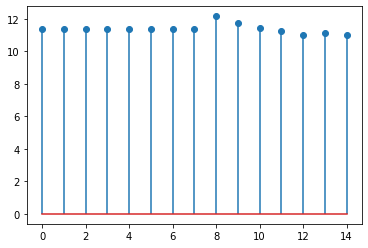

In [5]:
#Implementing Widrow-Hoff Least Mean Square Adaptive filter
for n in range(0, N-M):
    en = x[n]-np.dot(W,x[n:n+M])
    if en<0:
        break
    W= W + 2* mu * en * x[n:n+M]
    print(W)
    e[n] = en
    
plt.stem(W)
      

1.9200443704095152e-14

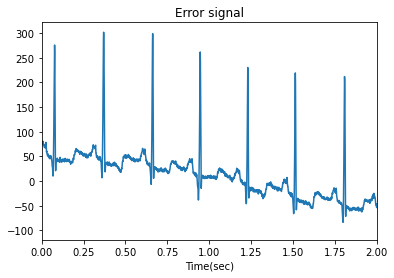

In [6]:
#Plotting of error signal
ind = np.arange(e.size)
t=ind*(1/Fs1)
plt.plot(t,e)
plt.xlabel('Time(sec)')
plt.title('Error signal')
plt.xlim(0,2)
np.mean(e)

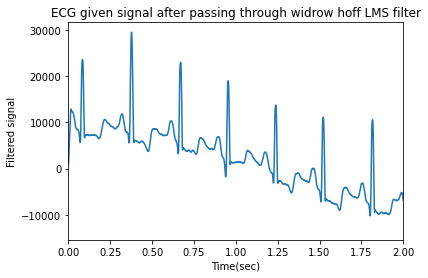

In [7]:
#Given signal after passing through LMS filter 
Y = signal.convolve(W,x)
Y = Y - np.mean(Y)
ind = np.arange(Y.size) #initializing index
t=ind*(1/Fs1) # to get time from no of samples

#plotting filtered signal
plt.plot(t,Y)
plt.ylabel('Filtered signal')
plt.xlabel('Time(sec)')
plt.title('ECG given signal after passing through widrow hoff LMS filter')
plt.xlim(0,2)
plt.show()

## part 2

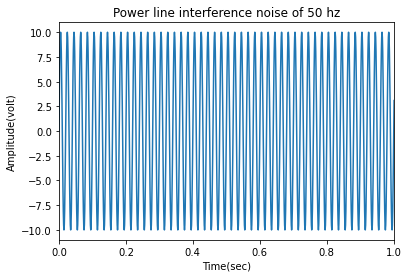

In [8]:
#Noise component due to power atrifacts of frequency 50hz sampled at 1000 Hz
from numpy import pi
fm= 50
fs= 1000
xax = np.arange(0,7.2,1/fs);
nse = 10*np.sin(2*pi*fm*xax);
plt.plot(xax,nse)
plt.xlabel('Time(sec)')
plt.xlim(0,1)
plt.ylabel('Amplitude(volt)')
plt.title('Power line interference noise of 50 hz')
plt.show()

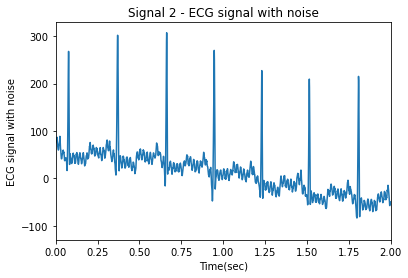

In [9]:
x2=x+nse
ind=np.arange(x2.size)
t=ind*(1/fs)
plt.plot(t,x2)
plt.xlabel('Time(sec)')
plt.ylabel('ECG signal with noise')
plt.title('Signal 2 - ECG signal with noise')
plt.xlim(0,2)
plt.show()

<StemContainer object of 3 artists>

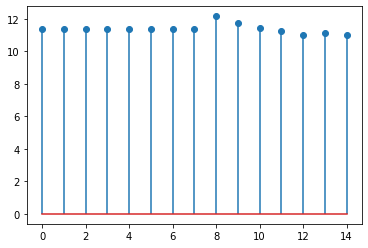

In [10]:
#Implementing Widrow-Hoff Least Mean Square Adaptive filter
for n in range(0, N-M):
    en = x2[n]-np.dot(W,x2[n:n+M])
    if en<0:
        break
    W= W + 2* mu * en * x2[n:n+M]
    print(W)
    e[n] = en
    
plt.stem(W)
     

1.9200443704095152e-14

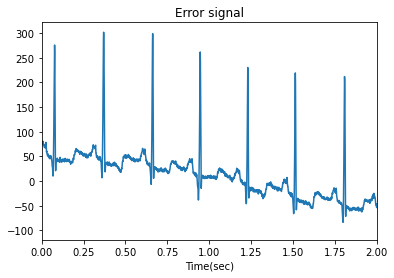

In [11]:
#Plotting of error signal
ind = np.arange(e.size)
t=ind*(1/fs)
plt.plot(t,e)
plt.xlabel('Time(sec)')
plt.title('Error signal')
plt.xlim(0,2)
np.mean(e)


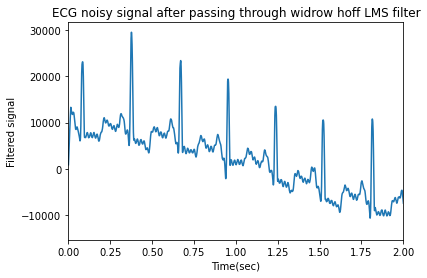

In [12]:
#Noisy signal after passing through LMS filter 
Z = signal.convolve(W,x2)
Z = Z - np.mean(Z)
ind = np.arange(Z.size) #initializing index
t=ind*(1/fs) # to get time from no of samples

#plotting filtered signal
plt.plot(t,Z)
plt.ylabel('Filtered signal')
plt.xlabel('Time(sec)')
plt.title('ECG noisy signal after passing through widrow hoff LMS filter')
plt.xlim(0,2)
plt.show()